# Problem Statement : Cluster Customers in groups to target the marketing campaign to right audience

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from xgboost import XGBRegressor
import statsmodels.api as sm

# Importing the data

In [2]:
cc_df = pd.read_csv('CC GENERAL.csv')


In [79]:
cc_original = pd.read_csv('CC GENERAL.csv')

In [3]:
cc_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
cc_df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# Drop the Customer_ID Column

cc_df = cc_df.drop(['CUST_ID'], axis = 1)

In [6]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [7]:
# There are some missing values

In [8]:
print(cc_df['CREDIT_LIMIT'].mean())
print(cc_df['CREDIT_LIMIT'].median())

4494.449450364621
3000.0


In [9]:
# Filling the single missing value of CREDIT_LIMIT column by median value 

cc_df.loc[(cc_df['CREDIT_LIMIT'].isnull()==True), 'CREDIT_LIMIT']= cc_df['CREDIT_LIMIT'].median()

In [10]:
cc_df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
cc_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [12]:
# Data will require normalization to bring in same scale

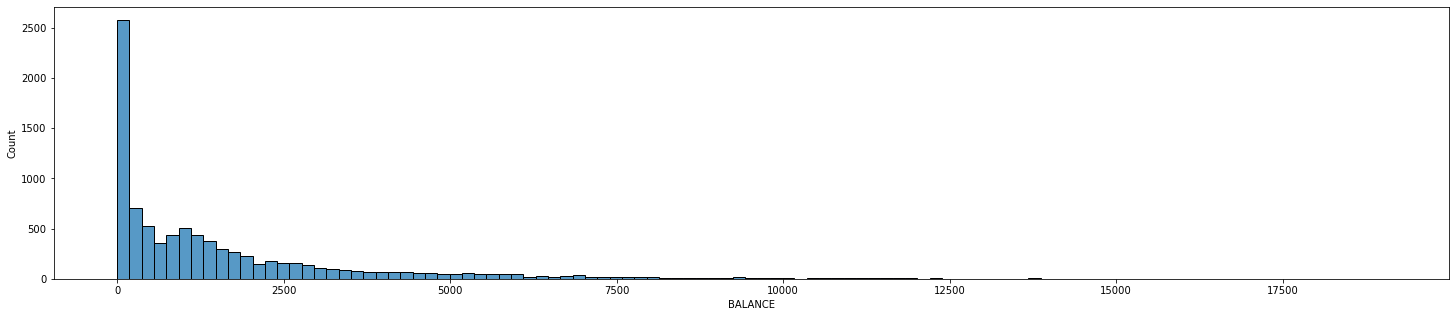

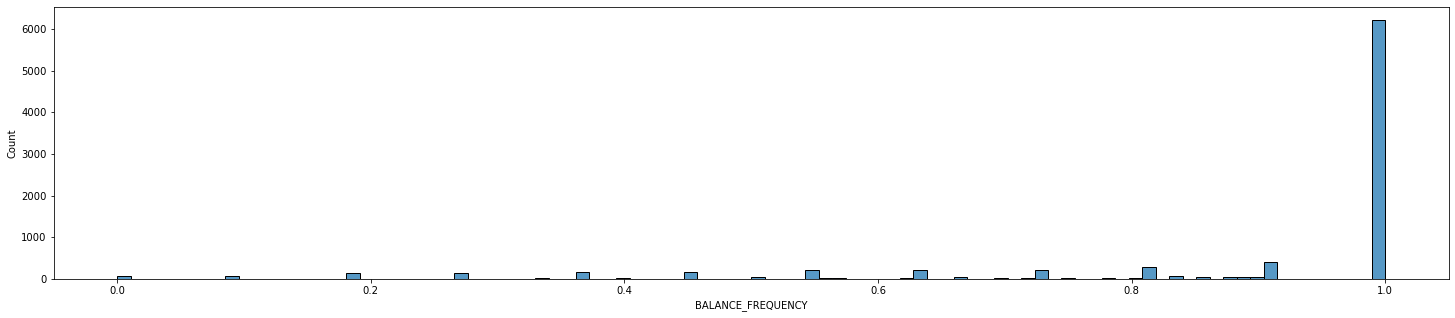

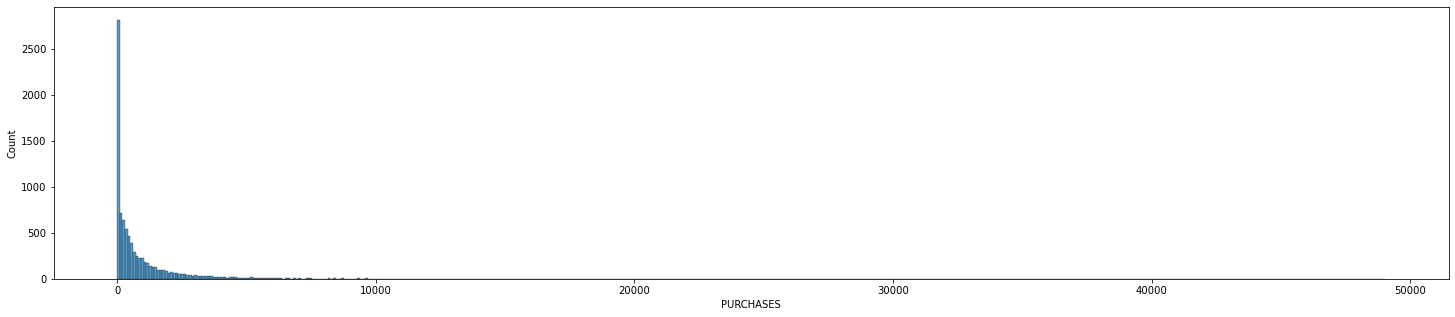

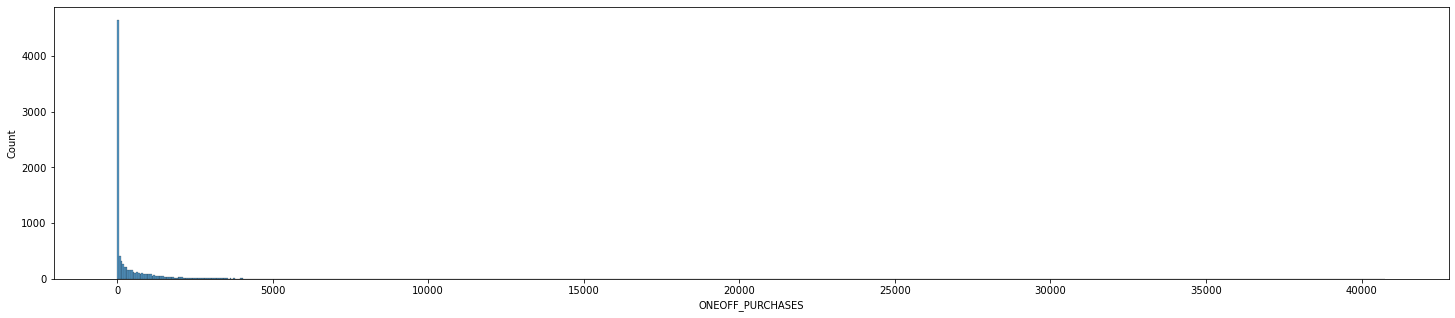

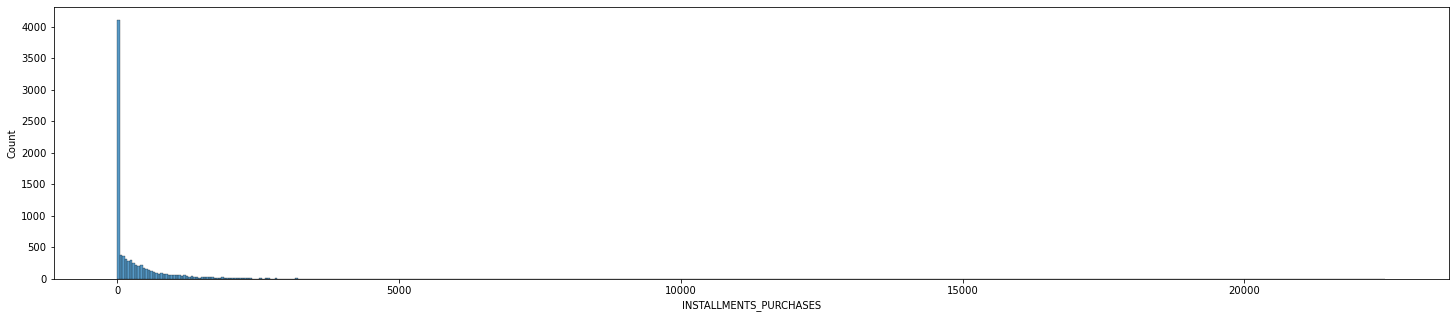

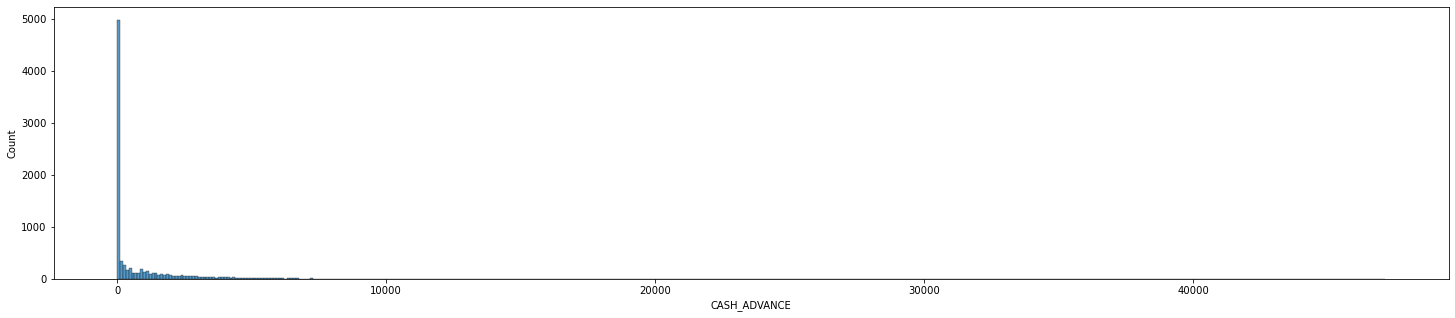

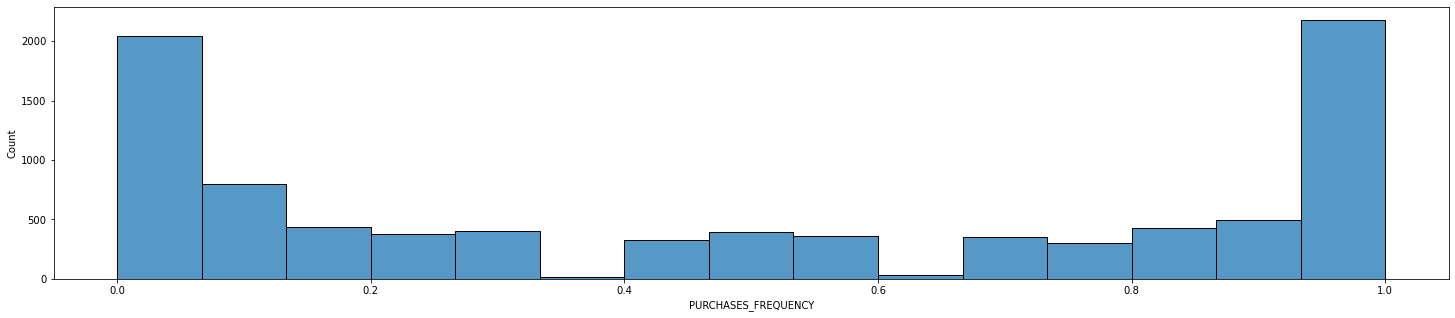

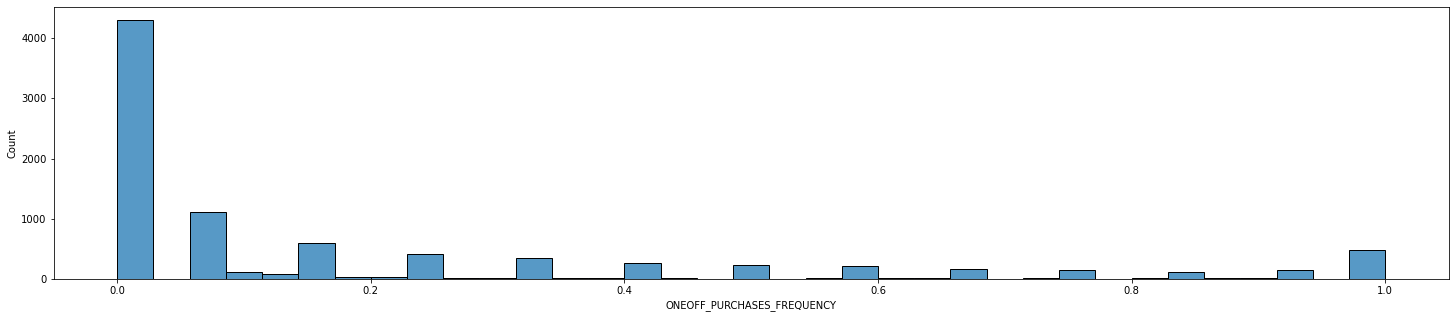

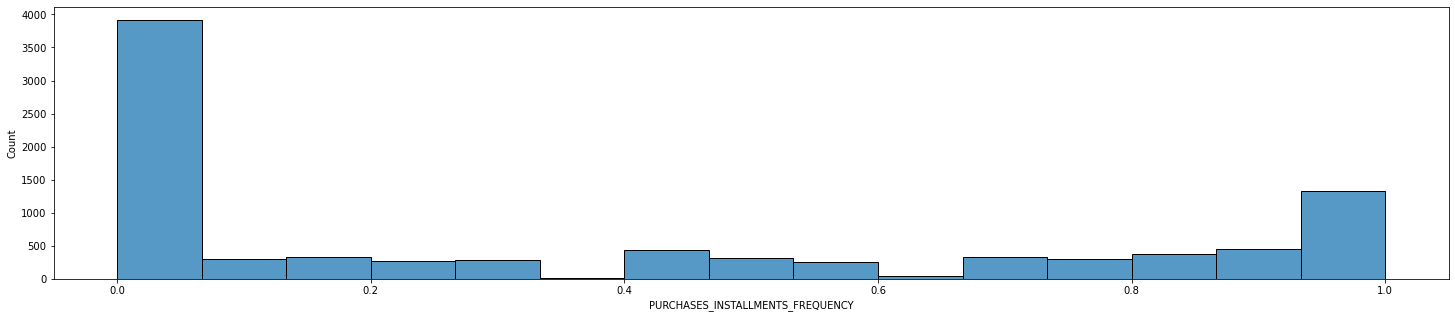

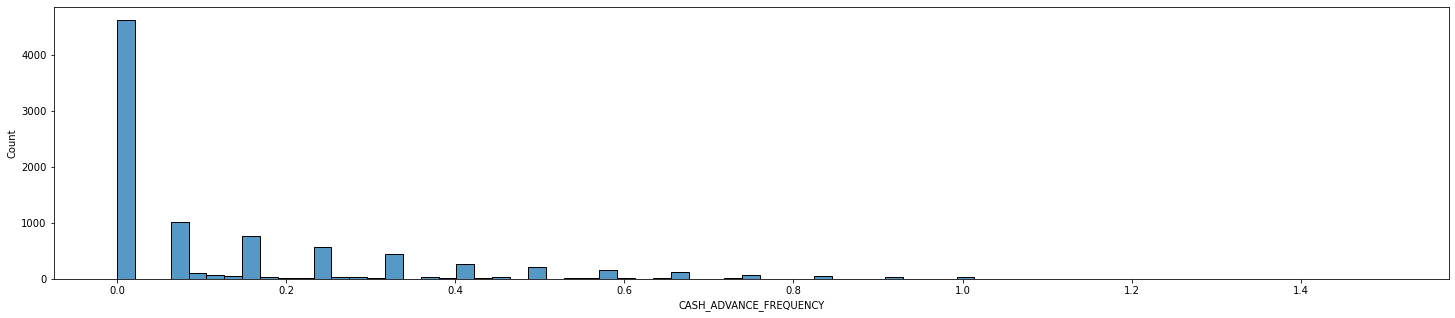

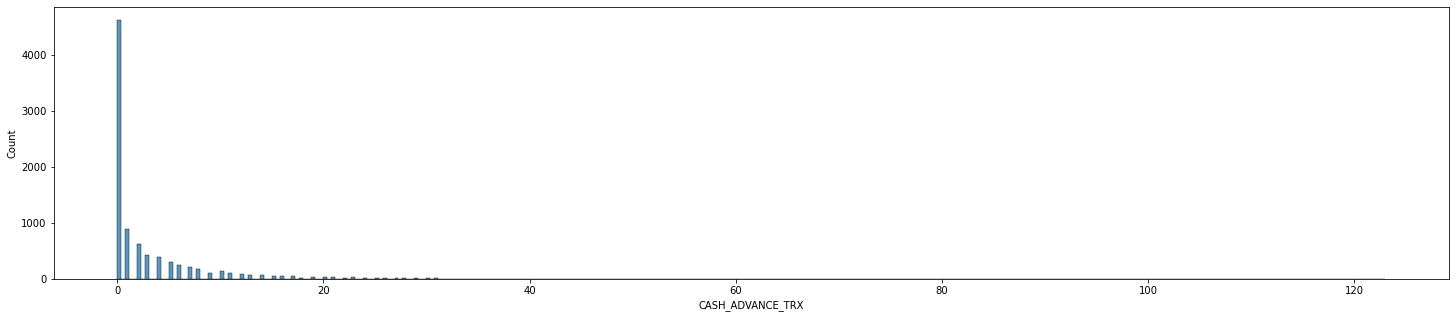

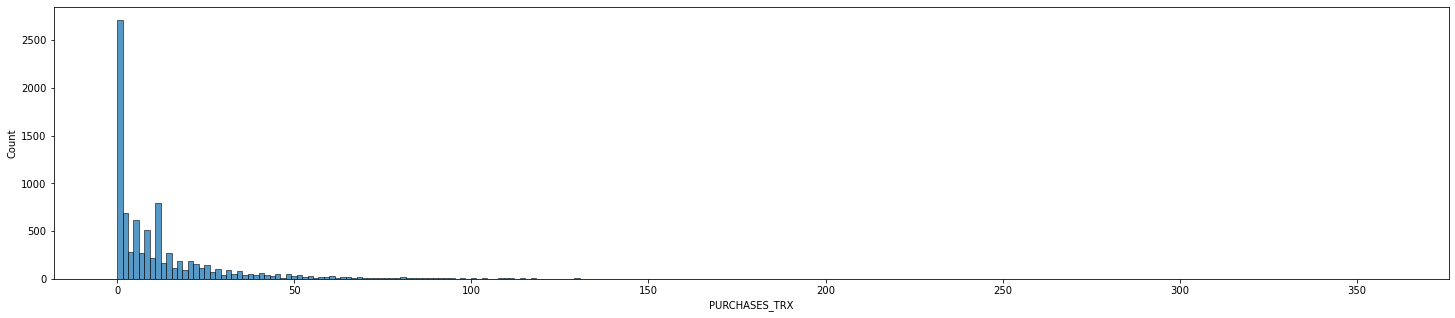

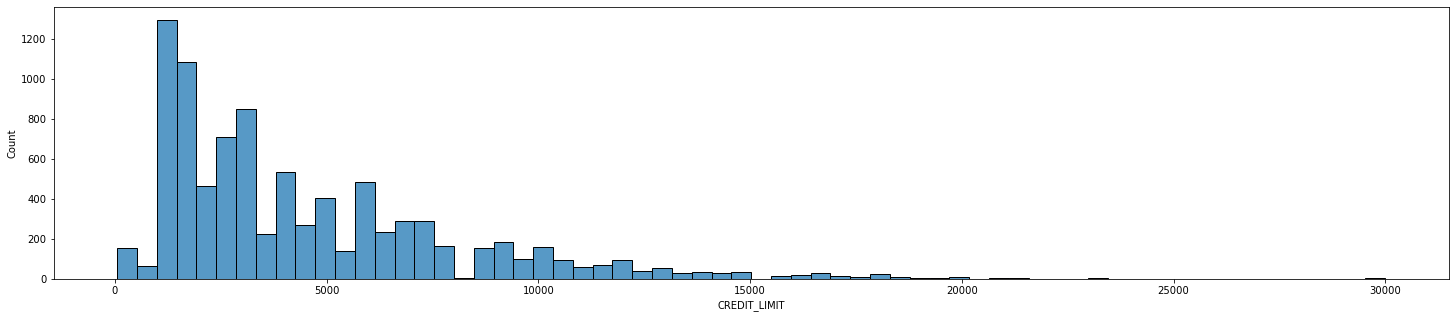

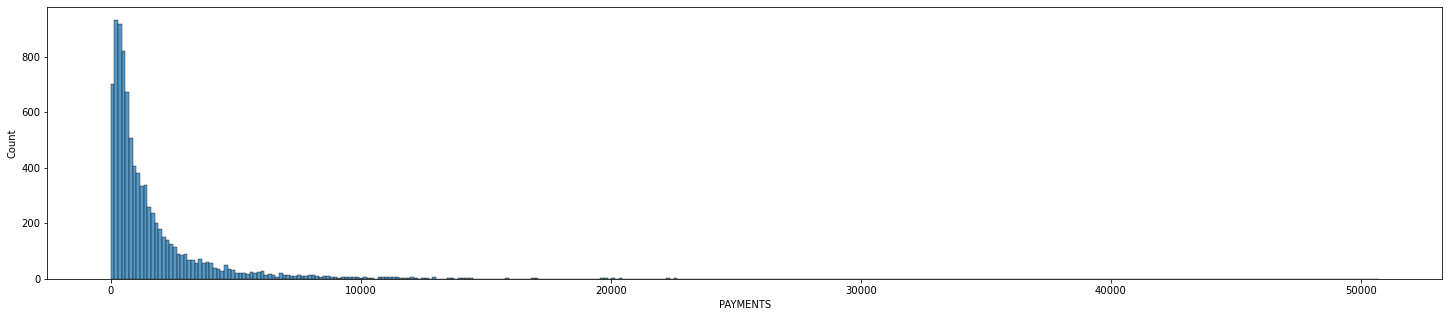

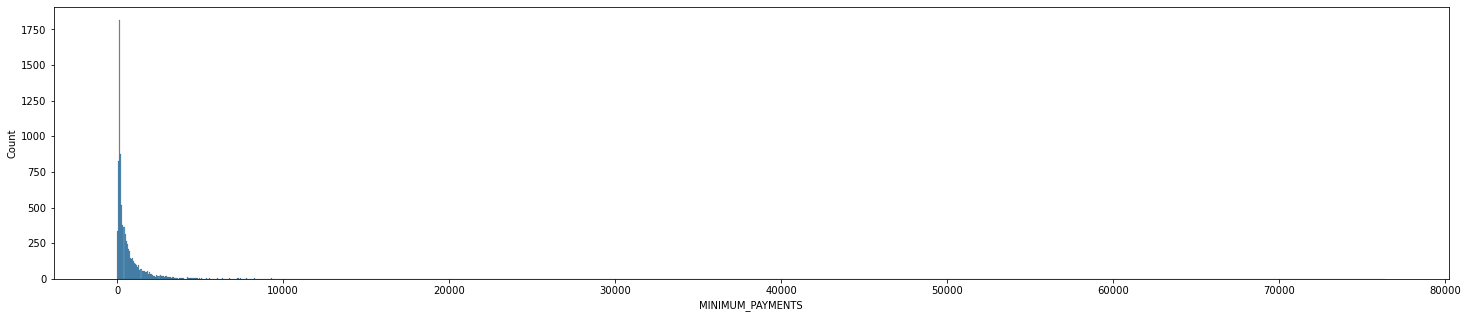

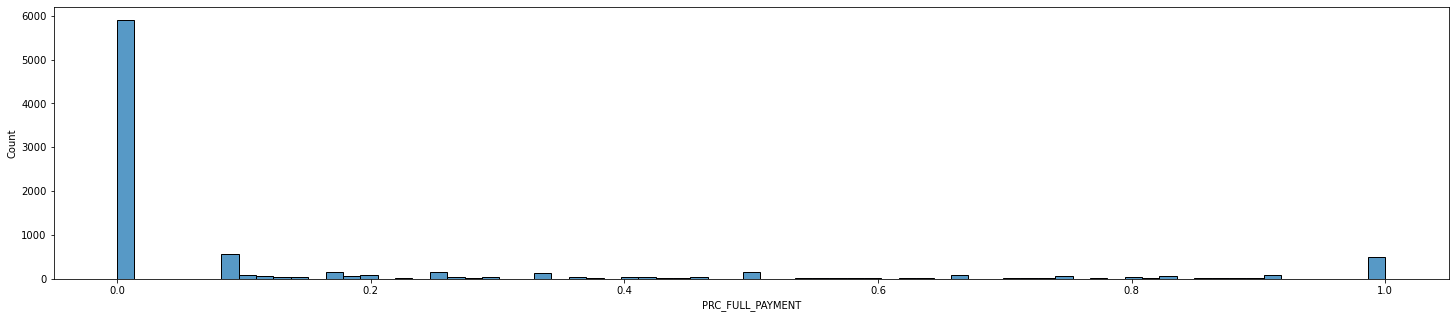

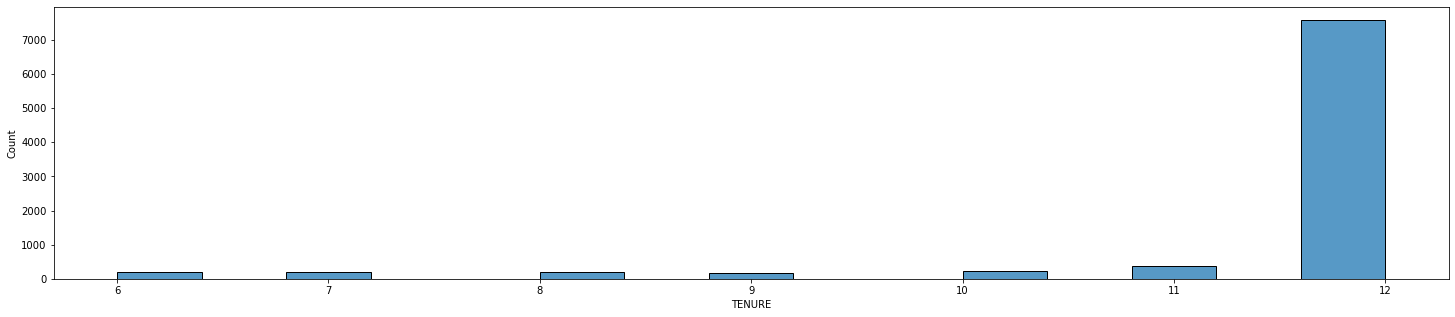

In [13]:
# Analyzing Each column individually to see the spread of data

for i in cc_df.columns:
    plt.figure(figsize = (25, 5))
    sns.histplot(cc_df[i])
    plt.show()

In [14]:
# Observation1: Many customers are not making any purchases
# Observation2: Maximum customers have credit limit less than 15000
# observation3: Most of the customers are holding the card for more than 12 months

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


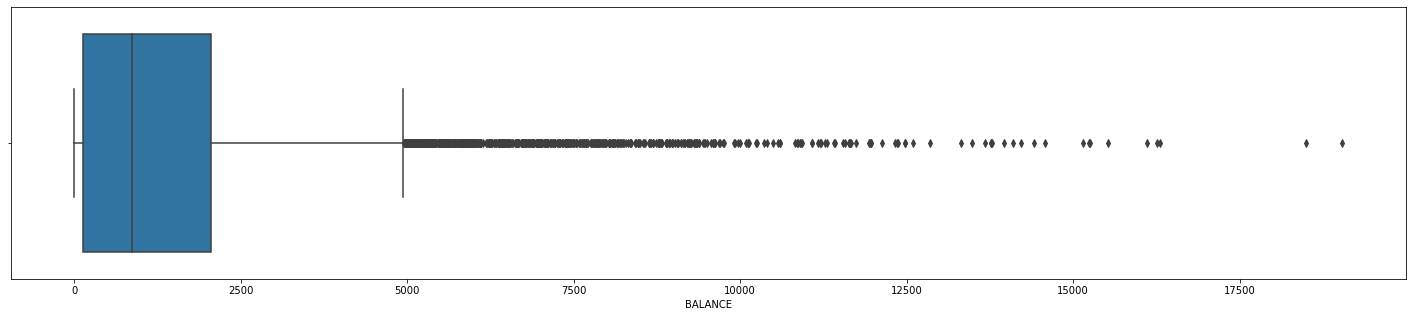

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


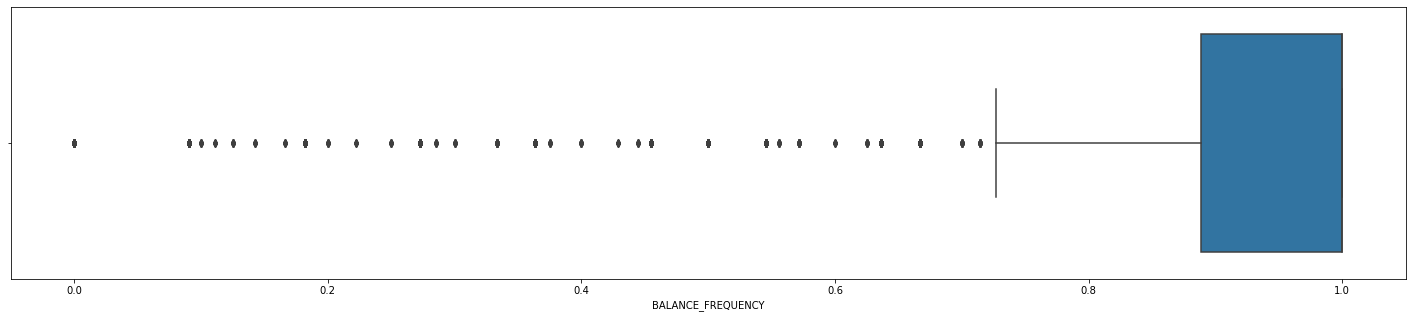

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


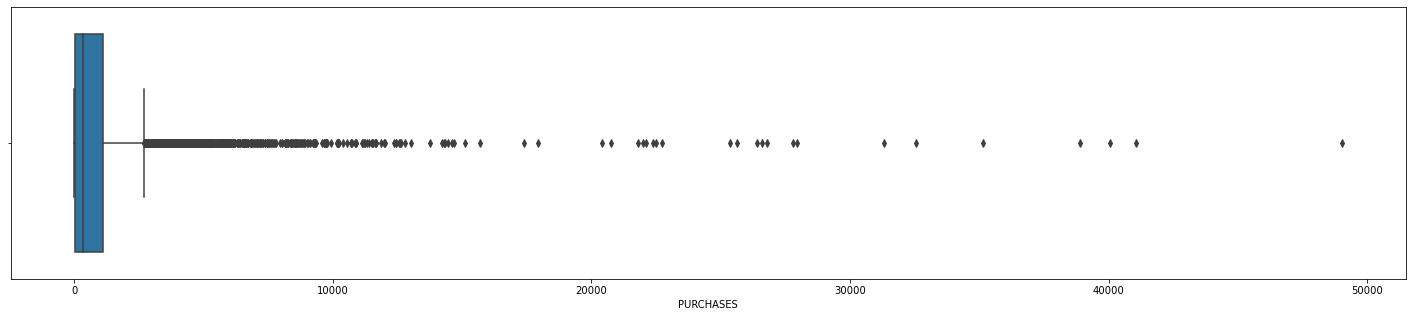

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


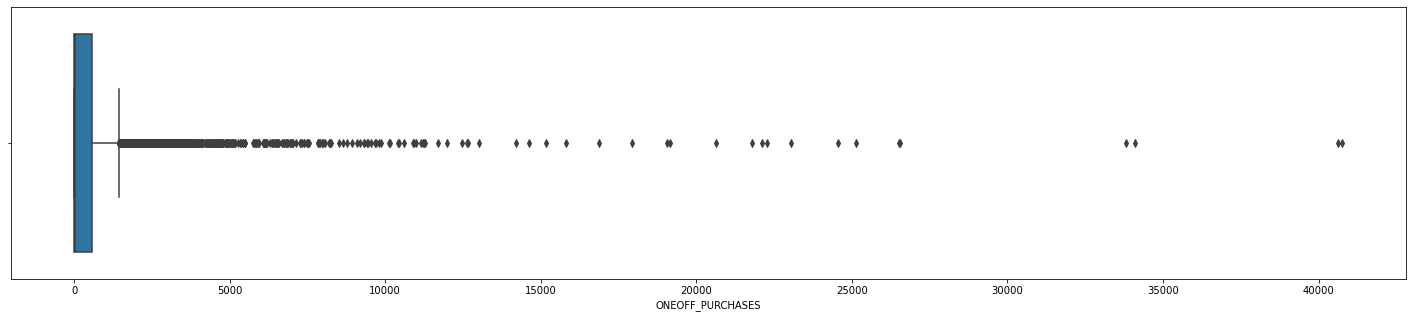

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


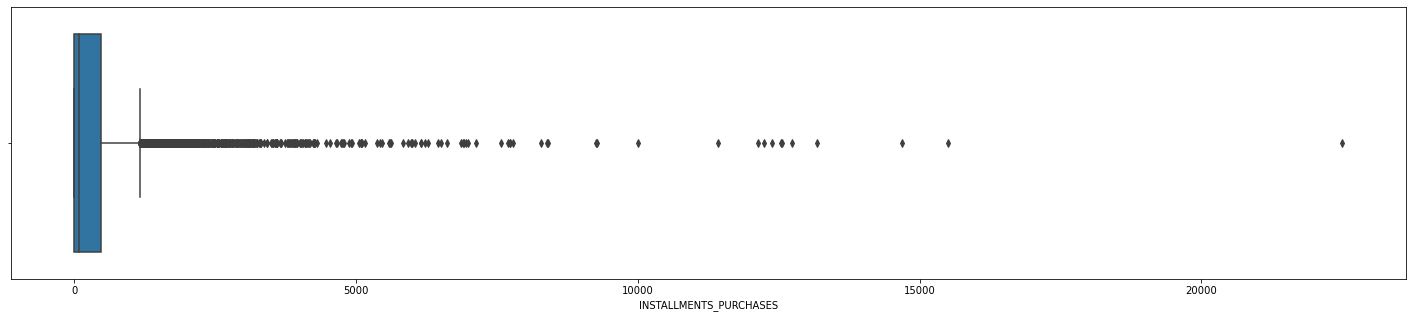

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


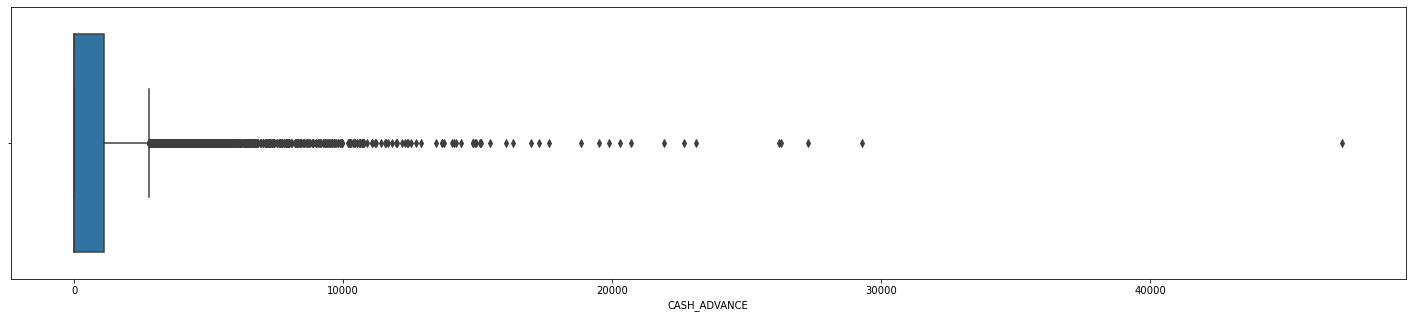

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


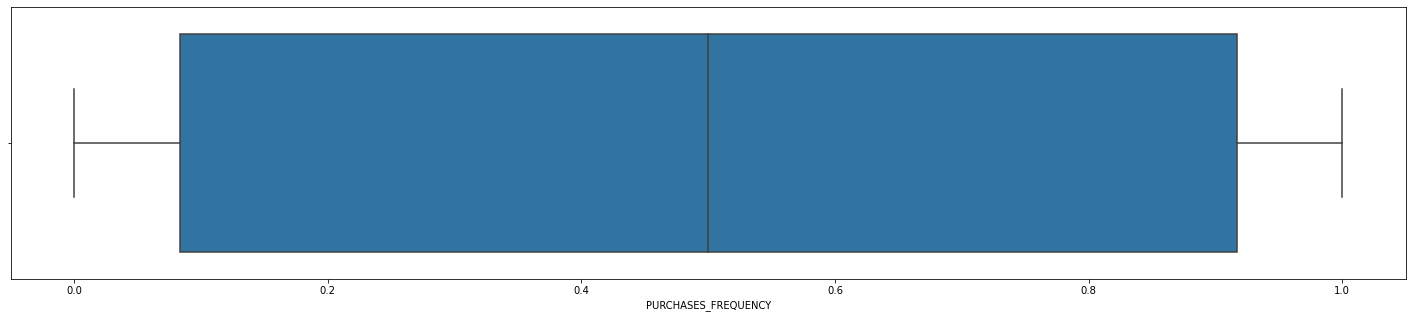

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


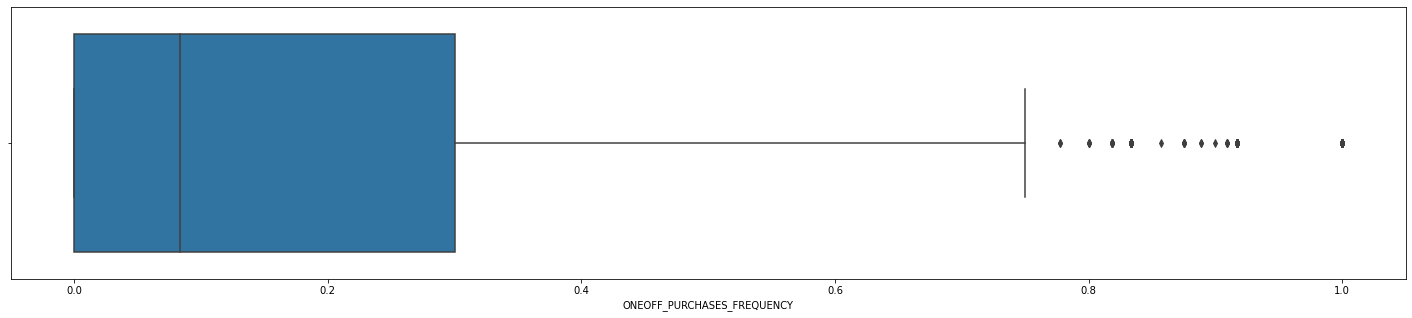

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


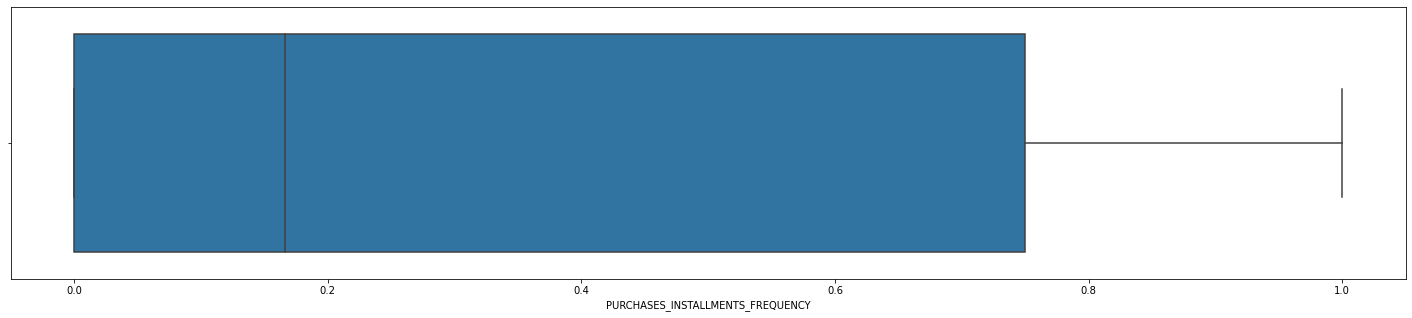

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


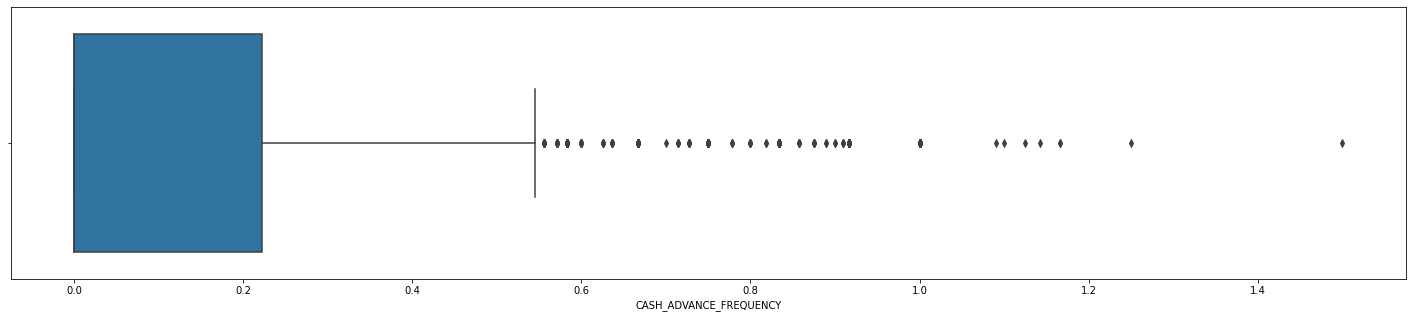

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


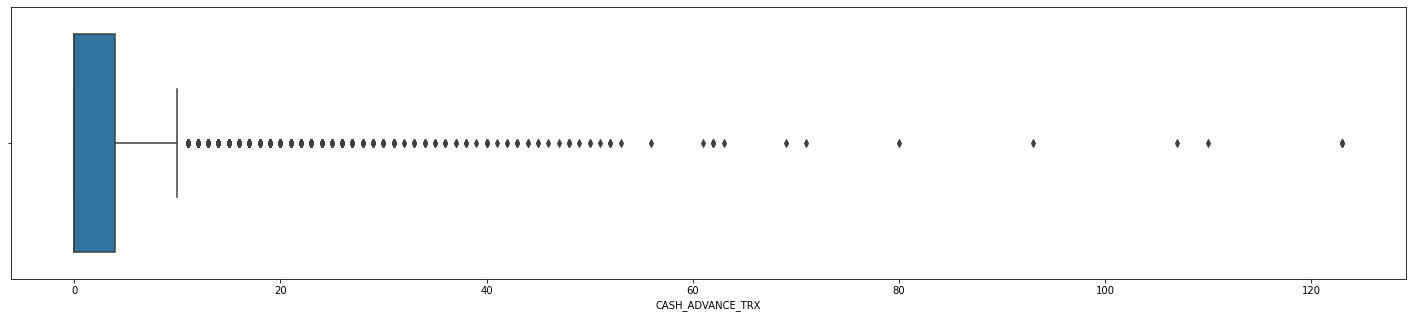

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


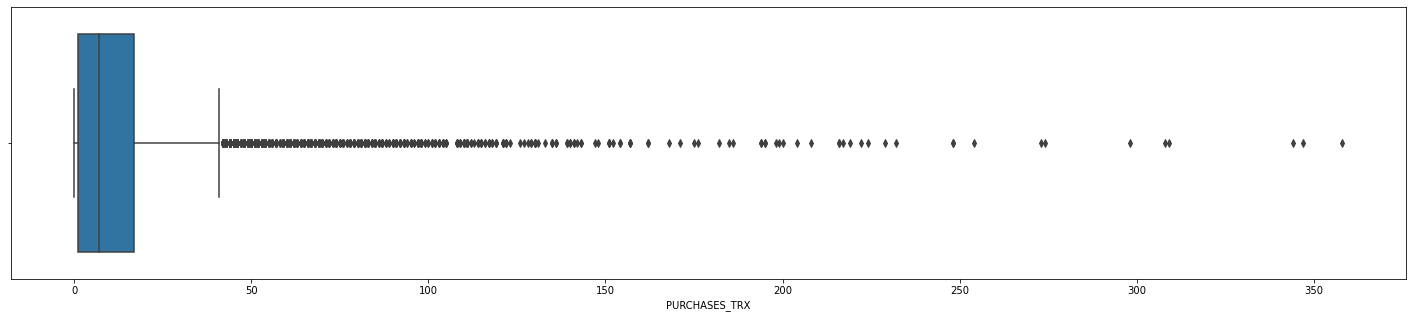

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


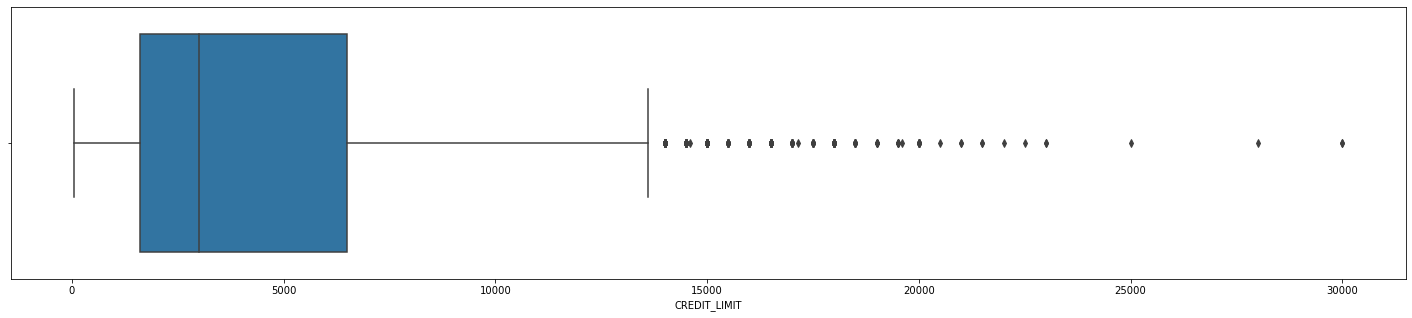

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


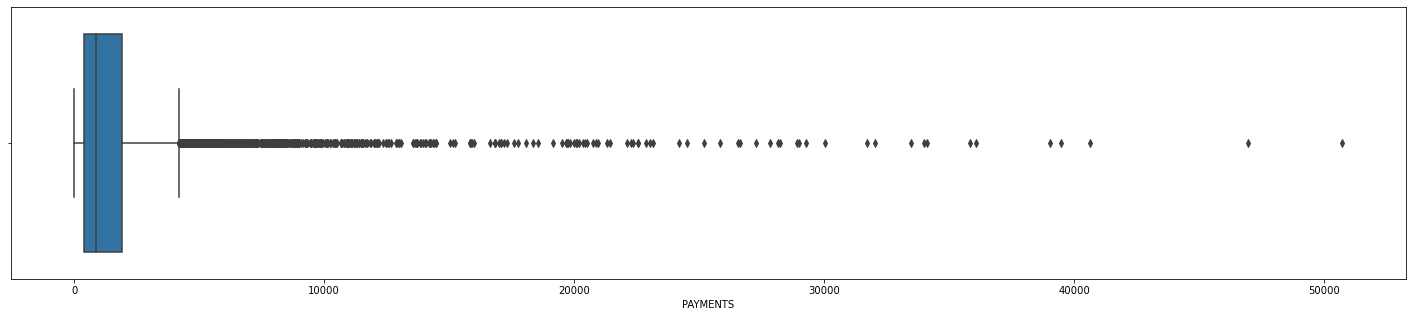

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


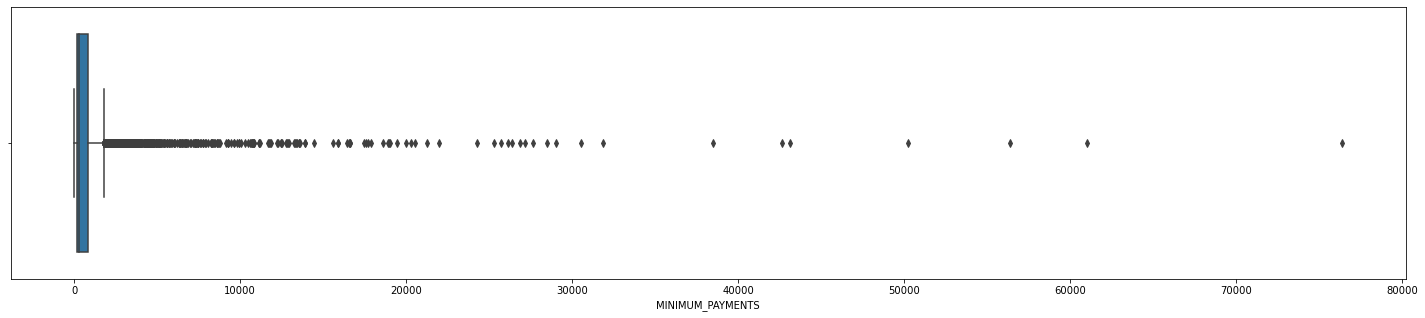

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


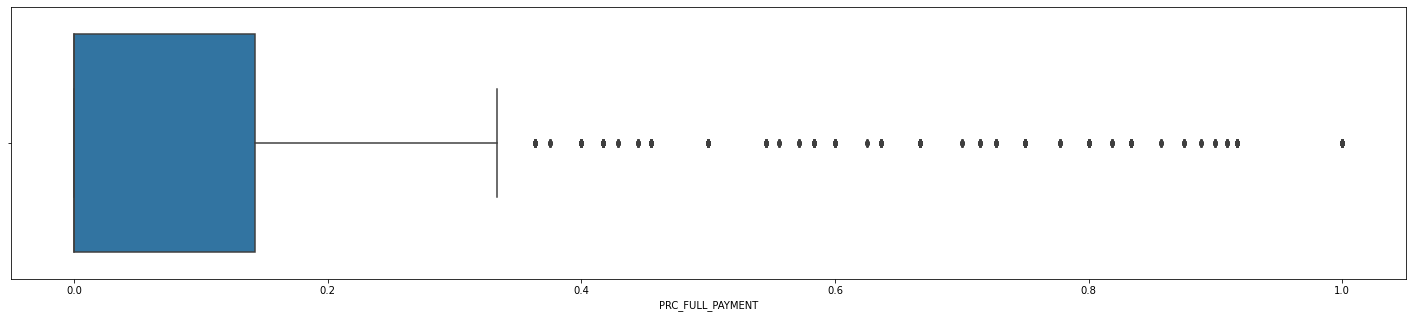

C:\Users\Saurabh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


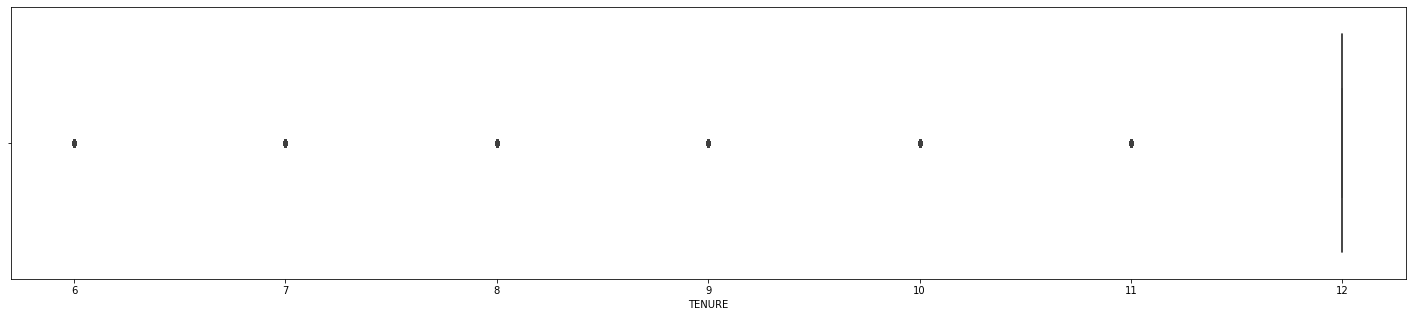

In [15]:
# Check the outliers with box plot

for i in cc_df.columns:
    plt.figure(figsize = (25, 5))
    sns.boxplot(cc_df[i])
    plt.show()

In [16]:
# There are lots of  outliers in several columns. As this project is about clustering the customers to run better marketing campaign
# and not on sensitive target like fraud detection etc. so we can go ahead with the outliers. Also we have to normalize this data 
# which will take care of outliers to some extent.

In [17]:
# As the column in skewed so We are imputing the missing value with median.
cc_df.loc[(cc_df['MINIMUM_PAYMENTS'].isnull()==True), 'MINIMUM_PAYMENTS']= cc_df['MINIMUM_PAYMENTS'].median()

In [18]:
cc_df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

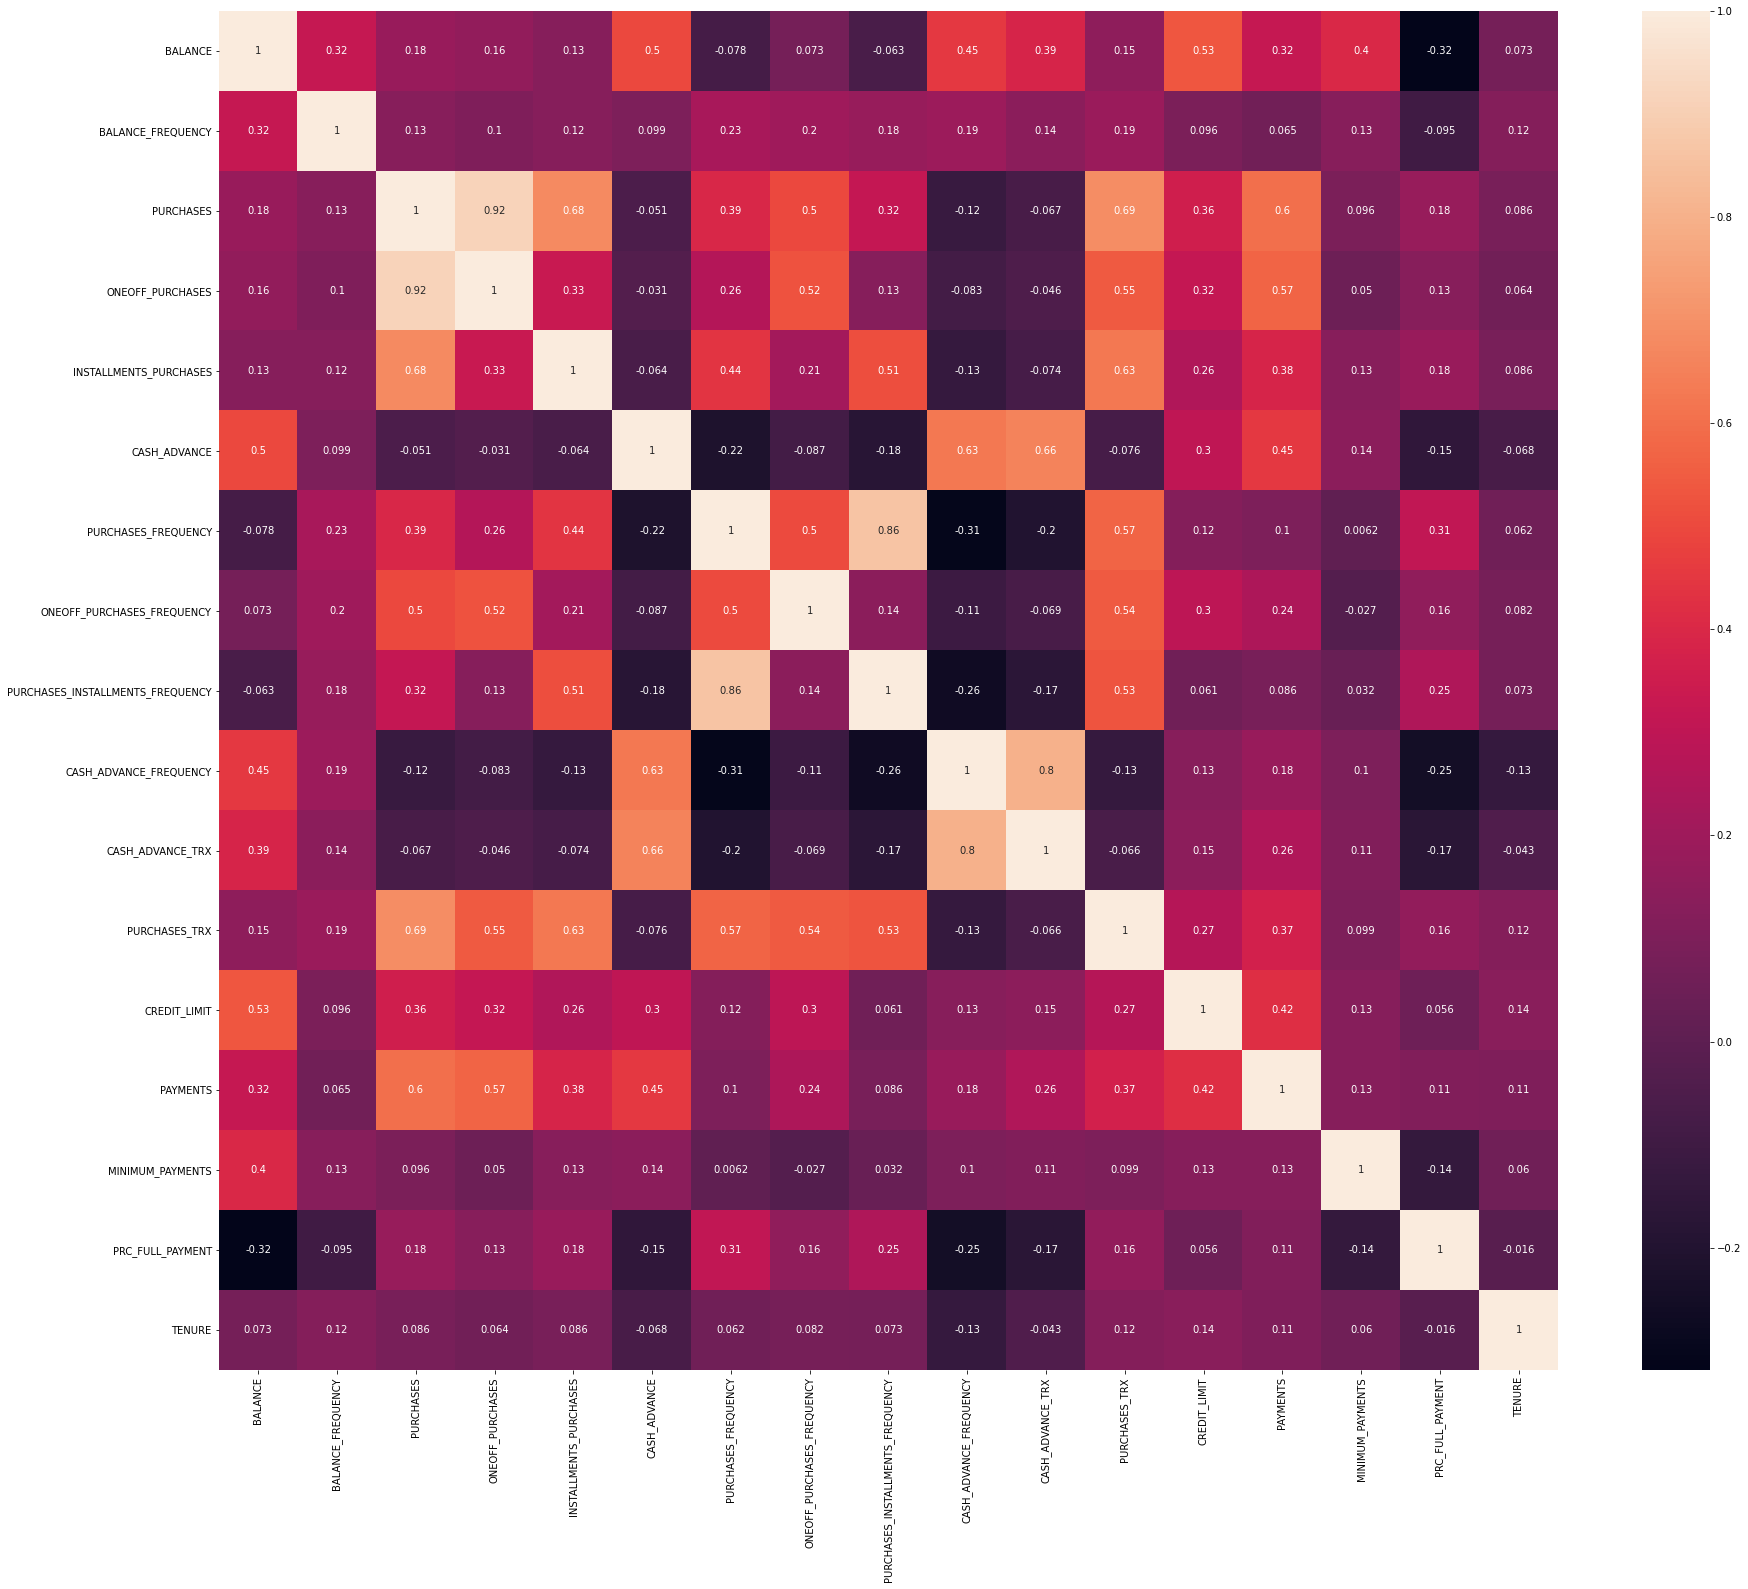

In [19]:
plt.figure(figsize=(30,25))
corr_df = cc_df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()


In [20]:
# Purchases, oneoffpurchases and investment purchases are highly correlated

In [21]:
# Check for duplicate values in data
cc_df.duplicated().sum()

0

In [22]:
# Normalizing the Data
scale = StandardScaler()
cc_df_s = scale.fit_transform(cc_df)

In [23]:
cc_df_s

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

# Applying K Mean Algorithm 

[152150.0000000004, 127784.83961722943, 112596.35623358312, 99062.21886640546, 91491.11253232537, 84841.92502091514, 79732.46474217517, 74469.0176840049, 69838.8921594546, 66443.01903810077]


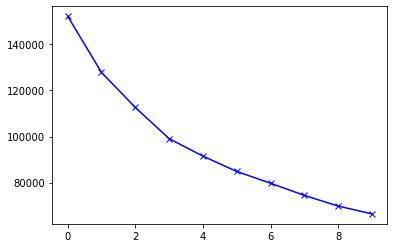

In [44]:
score = []

for i in range(1,11):
    km =KMeans(n_clusters=i)
    km.fit(cc_df_s)
    score.append(km.inertia_)
print(score)
plt.plot(score, 'bx-')


In [ ]:
# We can ovserve an elbow curve at 3rd Cluster

In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [42]:
s_scores = [] 

for i in range(2, 11):
    s_scores.append(silhouette_score(cc_df_s, KMeans(n_clusters = i).fit_predict(cc_df_s))) 
    
print(s_scores)

[0.20949692655850133, 0.2502438388859458, 0.1982604975021987, 0.19320594134750602, 0.20266504700585308, 0.2146193943009416, 0.21511519070055618, 0.2265893073293659, 0.22145451802906727]


In [28]:
# Silhouette Score has reached maximum at 3 clusters and then starts decreasing. This validates the elbow curve finding that 
# There should be 3 clusters

In [45]:
# Applying KMeans Algorithm

In [47]:
km = KMeans(3)
km.fit(cc_df_s)

label = km.labels_

In [48]:
km.cluster_centers_.shape

(3, 17)

In [49]:
# Identifying the Centroids
cluster_cent = pd.DataFrame(data= km.cluster_centers_, columns = [cc_df.columns])
cluster_cent

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.367479,-0.177887,-0.232767,-0.204343,-0.174860,-0.309079,-0.062550,-0.234845,-0.048108,-0.334283,-0.298843,-0.243458,-0.335601,-0.284432,-0.137957,0.007407,-0.028018
1,0.320273,0.439829,1.529887,1.281639,1.262380,-0.246793,1.142900,1.561562,0.956512,-0.358511,-0.250804,1.682610,0.891236,0.837033,0.162467,0.493205,0.303153
2,1.162459,0.342379,-0.290351,-0.207374,-0.305615,1.377064,-0.644183,-0.306886,-0.555404,1.560217,1.340884,-0.367484,0.598386,0.443955,0.403730,-0.410004,-0.127018


In [51]:
label.shape

(8950,)

In [52]:
l = km.fit_predict(cc_df_s)
l

array([2, 1, 2, ..., 2, 2, 2])

In [53]:
# Concat labels to original data frame

cc_df_clust = pd.concat([cc_df, pd.DataFrame({'Cluster' : label})], axis = 1)

cc_df_clust

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


# Principal Component Analysis

In [55]:
principal = PCA(n_components = 2)
p_c_a = principal.fit_transform(cc_df_s)

p_c_a

array([[-1.6836485 , -1.0722417 ],
       [-1.13408449,  2.50915138],
       [ 0.96939643, -0.38358219],
       ...,
       [-0.92898507, -1.80804885],
       [-2.33784552, -0.65360972],
       [-0.55802738, -0.40064529]])

In [56]:
pca_df = pd.DataFrame(data = p_c_a, columns = ['principal1', 'principal2'])

pca_df

,principal1,principal2
0,-1.683648,-1.072242
1,-1.134084,2.509151
2,0.969396,-0.383582
3,-0.888220,0.004648
4,-1.600021,-0.683795
...,...,...
8945,-0.362572,-2.013437
8946,-0.580810,-1.675664
8947,-0.928985,-1.808049
8948,-2.337846,-0.653610


In [57]:
# Concating the labels

pca_df = pd.concat([pca_df, pd.DataFrame({'Cluster' : label})], axis = 1)

pca_df

,principal1,principal2,Cluster
0,-1.683648,-1.072242,0
1,-1.134084,2.509151,2
2,0.969396,-0.383582,0
3,-0.888220,0.004648,0
4,-1.600021,-0.683795,0
...,...,...,...
8945,-0.362572,-2.013437,0
8946,-0.580810,-1.675664,0
8947,-0.928985,-1.808049,0
8948,-2.337846,-0.653610,0


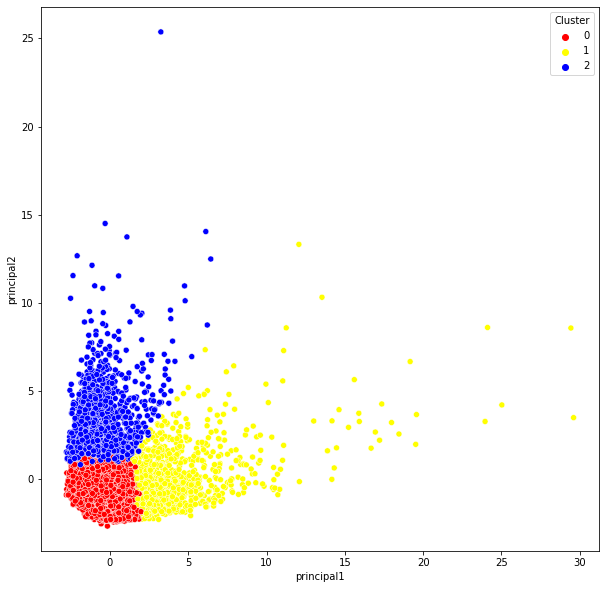

In [63]:
plt.figure(figsize = (10, 10))
ax = sns.scatterplot(x = 'principal1', y= 'principal2', hue = 'Cluster', data = pca_df, palette = ['red', 'yellow', 'blue'])
plt.show()

In [81]:
# Concating the Customer Id Column
cc_df_clust.insert(loc = 0, column = 'CUST_ID', value = cc_original['CUST_ID'] )

In [82]:
cc_df_clust.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,0
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [66]:
cc_df_clust[cc_df_clust ['Cluster'] == 0].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.000000,6119.0
mean,799.750669,0.835077,505.532394,253.120131,252.733061,330.817885,0.465072,0.132333,0.345145,0.068260,1.209675,8.653865,3271.510637,909.677092,523.213219,0.155750,11.479654,0.0
std,956.201884,0.268133,596.731142,481.466639,395.699977,659.034126,0.380146,0.221237,0.383380,0.105999,2.119046,9.494935,2651.266633,1125.483364,1233.039188,0.291098,1.384027,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,57.555491,0.727273,56.390000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,290.828629,150.083728,0.000000,12.000000,0.0
50%,424.968492,1.000000,304.600000,0.000000,78.470000,0.000000,0.416667,0.000000,0.166667,0.000000,0.000000,6.000000,2500.000000,569.815997,229.044312,0.000000,12.000000,0.0
75%,1242.384162,1.000000,740.405000,306.245000,362.065000,340.975889,0.833333,0.166667,0.714286,0.090909,2.000000,12.000000,4000.000000,1121.352150,477.926320,0.166667,12.000000,0.0
max,5941.271179,1.000000,5080.850000,4900.000000,3200.000000,7894.578816,1.000000,1.000000,1.000000,0.714286,23.000000,111.000000,23000.000000,23150.571840,26378.907820,1.000000,12.000000,0.0


In [67]:
cc_df_clust[cc_df_clust ['Cluster'] == 1].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1235.0
mean,2220.003291,0.981477,4268.520980,2717.828543,1551.178267,458.421147,0.949093,0.668166,0.744584,0.063014,1.528745,56.472065,7733.967611,4151.276172,1220.516917,0.298632,11.923077,1.0
std,2578.113212,0.074061,4271.091794,3627.676264,1863.794352,1327.302415,0.115520,0.312292,0.325993,0.134246,4.443936,43.010381,4348.787305,4792.106362,3582.409138,0.383977,0.532336,0.0
min,12.423203,0.090909,498.170000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,500.000000,0.000000,14.012997,0.000000,6.000000,1.0
25%,368.649661,1.000000,2147.515000,916.990000,477.255000,0.000000,0.916667,0.416667,0.583333,0.000000,0.000000,30.000000,4500.000000,1695.196387,190.890045,0.000000,12.000000,1.0
50%,1239.889457,1.000000,3129.670000,1789.700000,1089.920000,0.000000,1.000000,0.750000,0.916667,0.000000,0.000000,44.000000,7000.000000,2764.893686,373.988419,0.083333,12.000000,1.0
75%,3178.144796,1.000000,4792.340000,3205.560000,1928.280000,138.213145,1.000000,1.000000,1.000000,0.083333,1.000000,69.000000,10000.000000,4713.154325,1062.016091,0.666667,12.000000,1.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,19513.474830,1.000000,1.000000,1.000000,1.000000,62.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,1.0


In [68]:
cc_df_clust[cc_df_clust ['Cluster'] == 2].describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.00000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.0
mean,3989.142419,0.958403,384.528277,248.718133,135.887632,3866.210340,0.232290,0.110942,0.144242,0.447393,12.39787,5.612155,6675.441445,3019.108570,1787.616215,0.033774,11.347744,2.0
std,2683.535927,0.114234,738.651299,574.762960,349.323627,3388.864882,0.327418,0.202485,0.280091,0.221151,11.26134,10.764767,3750.575537,3951.693818,3657.384210,0.101246,1.523484,0.0
min,4.382924,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,0.000000,16.950090,0.000000,6.000000,2.0
25%,1874.334068,1.000000,0.000000,0.000000,0.000000,1826.237299,0.000000,0.000000,0.000000,0.250000,6.00000,0.000000,3500.000000,914.203755,568.659347,0.000000,12.000000,2.0
50%,3460.591743,1.000000,0.000000,0.000000,0.000000,3099.141193,0.000000,0.000000,0.000000,0.416667,10.00000,0.000000,6000.000000,1648.480730,1092.520377,0.000000,12.000000,2.0
75%,5563.588143,1.000000,463.377500,226.397500,70.062500,4810.617881,0.416667,0.166667,0.166667,0.583333,15.00000,7.000000,9000.000000,3407.135085,1830.049619,0.000000,12.000000,2.0
max,16304.889250,1.000000,7194.530000,6678.260000,3887.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.00000,85.000000,19600.000000,39048.597620,61031.618600,1.000000,12.000000,2.0


In [75]:
cc_df_clust[cc_df_clust ['PURCHASES_INSTALLMENTS_FREQUENCY'] > 0]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.00,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.00,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,2
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.00,6,0


In [83]:
cc_df_clust.to_csv('Clustered_Data.csv')

# Conclusion

Based on the clusters and EDA we can identify 3 main cluster of customers

PURCHASE :

1) Cluster 1 is using the card for purchases in optimum capacity.

2) Purchase Frequency, Purchase Transaction and Average Purchase for Cluster 0 is low and Cluster 2 is very low

3) Cluster 0 and Cluster 2 has potential to increase the purchase ratio. So Banks can target their promotional campaign towards them on this line. This is true for both one time purchase and installment purchases.

Card Usage :

1) Looking at the average credit limit and average balance in card account it is visible that cluster 0 and cluster 2 are not  utilising their respective card credit limit at optimum level. Card utilising in Cluster 2 is very low. All cross branding tie-ups of banks should be advertised to them to push for card usage. 

2) Average balance frequency is more than 84 percent in all three categories which can be interpreted as the timely bill payments from customers. 


Data Analysis Observation : 

1) 5035 Customers who have made installment purchases. Bank should make advertising and promotional offer towards these customers to maximise the potential. As they are the customers actually paying interest to bank on their purchases.